In [35]:
import matplotlib.pyplot as plt
from itertools import combinations
from math import exp
from scipy.stats import norm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

df = pd.read_csv('kc_house_data_train.csv', index_col = 0)

#clean data

def clean_data(df):
    #df['date'] = df['date'].apply(lambda x : x[0:4] + '-' + x[4:6] + '-' + x[6:8])
    pd.to_datetime(df['date'])
    #log sqft_lot
    df['sqft_lot_log'] = np.log(df['sqft_lot'])
    #get dummy vars for all categorical data
#     #floors
#     floors = pd.get_dummies(df['floors'], prefix='floors')
#     floors.iloc[:,0].drop(inplace=True)
#     df = pd.concat([df, ], 1)
    
#     #view
#     df = pd.concat([df, pd.get_dummies(df['view'], prefix='view')], 1)
#     #condition
#     df = pd.concat([df, pd.get_dummies(df['condition'], prefix='condition')], 1)
#     #grade
#     df = pd.concat([df, pd.get_dummies(df['grade'], prefix='grade')], 1)
#     #bedrooms
#     df = pd.concat([df, pd.get_dummies(df['bedrooms'], prefix='bedrooms')], 1)
#     #bathrooms
#     df = pd.concat([df, pd.get_dummies(df['bathrooms'], prefix='bathrooms')], 1)
#     #has basement
#     df['has_basement'] = df['sqft_basement'].apply(lambda x : has_basement(x))
#     #fix year var
    
    return df
def has_basement(x):
    if(x > 0):
        return 1
    else :
        return 0
            
df = clean_data(df)


#standardize data
df.head(1)
df.columns
combs = list(combinations(df.columns, 2))
combs

[('id', 'date'),
 ('id', 'price'),
 ('id', 'bedrooms'),
 ('id', 'bathrooms'),
 ('id', 'sqft_living'),
 ('id', 'sqft_lot'),
 ('id', 'floors'),
 ('id', 'waterfront'),
 ('id', 'view'),
 ('id', 'condition'),
 ('id', 'grade'),
 ('id', 'sqft_above'),
 ('id', 'sqft_basement'),
 ('id', 'yr_built'),
 ('id', 'yr_renovated'),
 ('id', 'zipcode'),
 ('id', 'lat'),
 ('id', 'long'),
 ('id', 'sqft_living15'),
 ('id', 'sqft_lot15'),
 ('id', 'sqft_lot_log'),
 ('date', 'price'),
 ('date', 'bedrooms'),
 ('date', 'bathrooms'),
 ('date', 'sqft_living'),
 ('date', 'sqft_lot'),
 ('date', 'floors'),
 ('date', 'waterfront'),
 ('date', 'view'),
 ('date', 'condition'),
 ('date', 'grade'),
 ('date', 'sqft_above'),
 ('date', 'sqft_basement'),
 ('date', 'yr_built'),
 ('date', 'yr_renovated'),
 ('date', 'zipcode'),
 ('date', 'lat'),
 ('date', 'long'),
 ('date', 'sqft_living15'),
 ('date', 'sqft_lot15'),
 ('date', 'sqft_lot_log'),
 ('price', 'bedrooms'),
 ('price', 'bathrooms'),
 ('price', 'sqft_living'),
 ('price', 's

In [73]:
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livinggrade
# sqft_livingcondition
# sqft_livingzipcode
from sklearn.linear_model import Lasso, Ridge, LinearRegression
target = df[['price']]
features = df[['bedrooms','bathrooms',
               'sqft_living', 'view','waterfront',
               'floors','condition', 'grade',
              'yr_built']]
features1 = df[['sqft_living', 'bedrooms', 'grade', 'condition', 'yr_built', 'zipcode', 'sqft_lot_log']]
features2 = df[['sqft_living', 'grade', 'condition', 'waterfront', 'zipcode']]
X_train , X_test, y_train, y_test = train_test_split(target, features2, test_size=0.2, random_state=12)

ridge_01 = Ridge(alpha=0.5)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.5)
lasso_01.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
len(lasso_01.predict(X_test))

3458

In [78]:
lasso_01.coef_.sum()

0.0016920718780516315

In [82]:
ridge_predicts = ridge_01.predict(X_train)
ridge_true = ridge_01.predict(X_test)
metrics.mean_squared_error(y_train, ridge_predicts)
metrics.mean_squared_error(y_test, ridge_true)

85242.7318138703

In [75]:
# create predictions
y_h_ridge_train_01 = ridge_01.predict(X_train)
y_h_ridge_test_01 = ridge_01.predict(X_test)

#y_h_lasso_train_01 = np.reshape(lasso_01.predict(X_train),(13832,1))
#y_h_lasso_test_01 = np.reshape(lasso_01.predict(X_test),(3458,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [77]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train_01)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test_01)**2))
print('\n')

#print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train_01)**2))
#print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test_01)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

print('Train Error Ridge MSE', (np.sum(y_train - y_h_ridge_train_01)**2) / len(y_train))
print('Test Error Ridge MSE', (np.sum(y_test - y_h_ridge_test_01)**2) / len(y_train))
print('\n')
print('Train Error Unpenalized Linear Model MSE', (np.sum(y_train - lin.predict(X_train))**2) / len(y_train))
print('Test Error Unpenalized Linear Model MSE', (np.sum(y_test - lin.predict(X_test))**2) / len(y_train))
print('\n')

Train Error Ridge Model sqft_living    5.855973e+09
grade          1.059184e+04
condition      5.871573e+03
waterfront     9.528466e+01
zipcode        3.939813e+07
dtype: float64
Test Error Ridge Model sqft_living    1.538151e+09
grade          2.684482e+03
condition      1.452807e+03
waterfront     3.121024e+01
zipcode        1.016878e+07
dtype: float64




Train Error Unpenalized Linear Model sqft_living    5.855973e+09
grade          1.059184e+04
condition      5.871573e+03
waterfront     9.528466e+01
zipcode        3.939813e+07
dtype: float64
Test Error Unpenalized Linear Model sqft_living    1.538151e+09
grade          2.684482e+03
condition      1.452807e+03
waterfront     3.121024e+01
zipcode        1.016878e+07
dtype: float64
Train Error Ridge MSE sqft_living    1.134746e-22
grade          1.376044e-27
condition      1.275692e-27
waterfront     9.601303e-31
zipcode        4.166746e-19
dtype: float64
Test Error Ridge MSE sqft_living    343135.917151
grade               0.478686


In [44]:
features_list = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'grade', 'condition', 'zipcode']
combs = list(combinations(df.columns, 2))
comb_rsquared_dict = {}
for c in range(0, len(combs)):
    if (combs[c][0] == 'price' or combs[c][1] == 'price'):
        continue
    form_str = "price~" + combs[c][0] + "+"  + combs[c][1]
    lin = ols(formula=form_str, data=df).fit()
    comb_rsquared_dict[combs[c][0] + '' + combs[c][1]] = lin.rsquared
comb_rsquared_dict  

{'iddate': 0.023664417301695884,
 'idbedrooms': 0.09331983672429522,
 'idbathrooms': 0.27523843090200484,
 'idsqft_living': 0.4950005187311992,
 'idsqft_lot': 0.007554233366710239,
 'idfloors': 0.06644322956837878,
 'idwaterfront': 0.07629946780661645,
 'idview': 0.15683389055108987,
 'idcondition': 0.0015320398317942852,
 'idgrade': 0.44415746490046204,
 'idsqft_above': 0.36942335514373337,
 'idsqft_basement': 0.10474094382251498,
 'idyr_built': 0.003456170335919828,
 'idyr_renovated': 0.01404778101127524,
 'idzipcode': 0.0026543381092710705,
 'idlat': 0.09166938584898277,
 'idlong': 0.0006289714145886194,
 'idsqft_living15': 0.3430154864186974,
 'idsqft_lot15': 0.006648281481039242,
 'idsqft_lot_log': 0.02622901202091854,
 'datebedrooms': 0.11541772451165011,
 'datebathrooms': 0.29312509080596116,
 'datesqft_living': 0.5084191641820115,
 'datesqft_lot': 0.03092518439197134,
 'datefloors': 0.0876653747799705,
 'datewaterfront': 0.09780681294926108,
 'dateview': 0.177221725332109,
 'da

In [45]:
#
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livinggrade
# sqft_livingcondition
# sqft_livingzipcode

#with log
# datesqft_living
# bedroomssqft_living
# sqft_livingwaterfront
# sqft_livingview
# sqft_livingcondition
# sqft_livinggrade
# sqft_livingyr_built
# sqft_livingyr_renovated
# sqft_livingzipcode
# sqft_livinglat
# sqft_livinglong
# sqft_livingsqft_living15
# sqft_livingsqft_lot_log
# gradeyr_built


#sqft_living, bedrooms, grade, condition, yr_built, zipcode
comb_rsquared_dict
for key in comb_rsquared_dict:
    if (comb_rsquared_dict[key] > 0.5):
        print(key)

datesqft_living
bedroomssqft_living
sqft_livingwaterfront
sqft_livingview
sqft_livingcondition
sqft_livinggrade
sqft_livingyr_built
sqft_livingyr_renovated
sqft_livingzipcode
sqft_livinglat
sqft_livinglong
sqft_livingsqft_living15
sqft_livingsqft_lot_log
gradeyr_built


In [41]:
for c in comb_rsquared_dict:
    print(c)

bedroomsbathrooms
bedroomssqft_living
bedroomssqft_lot
bedroomsfloors
bedroomswaterfront
bedroomsgrade
bedroomscondition
bedroomszipcode
bathroomssqft_living
bathroomssqft_lot
bathroomsfloors
bathroomswaterfront
bathroomsgrade
bathroomscondition
bathroomszipcode
sqft_livingsqft_lot
sqft_livingfloors
sqft_livingwaterfront
sqft_livinggrade
sqft_livingcondition
sqft_livingzipcode
sqft_lotfloors
sqft_lotwaterfront
sqft_lotgrade
sqft_lotcondition
sqft_lotzipcode
floorswaterfront
floorsgrade
floorscondition
floorszipcode
waterfrontgrade
waterfrontcondition
waterfrontzipcode
gradecondition
gradezipcode
conditionzipcode


In [52]:
df.replace(to_replace=(df['sqft_basement'] > 0), value=1)


<class 'str'>


0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [24]:
floors = pd.get_dummies(df['floors'], prefix='floors')
floors.iloc[:,0]

0        0
1        1
2        0
3        0
4        0
        ..
17285    1
17286    0
17287    1
17288    0
17289    1
Name: floors_1.0, Length: 17290, dtype: uint8

In [41]:
Y = df[['price']]
X = df.drop(['price'], axis=1)

(17290, 20)

(17290, 1)
(17290,)


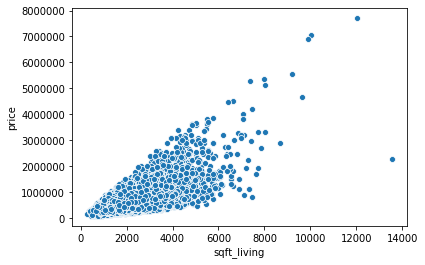

In [48]:
print(Y.shape)
print(X['sqft_living'].shape)
sns.scatterplot(df['sqft_living'], df['price'])
plt.show()

In [27]:
floors = pd.get_dummies(df['floors'], prefix='floors')
#floors.drop(columns=floors.iloc[:,0], inplace=True)
floors

,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
17285,1,0,0,0,0,0
17286,0,0,1,0,0,0
17287,1,0,0,0,0,0
17288,0,1,0,0,0,0


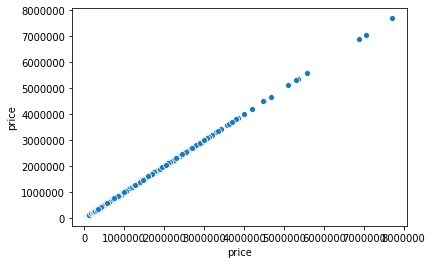

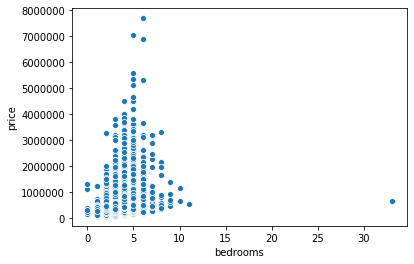

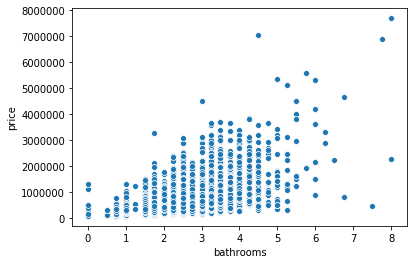

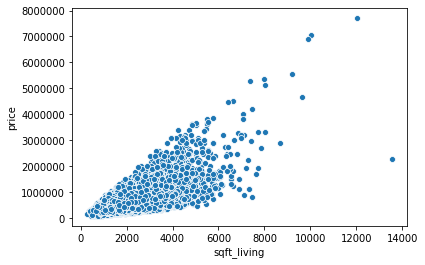

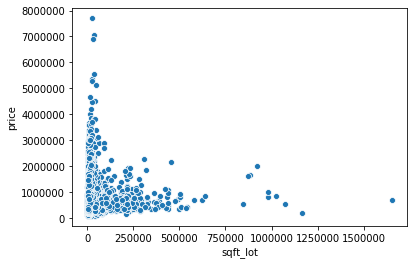

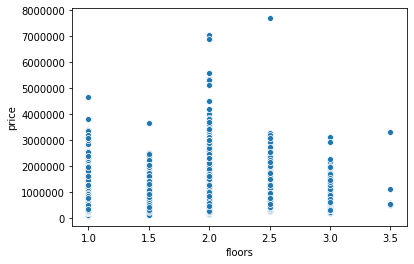

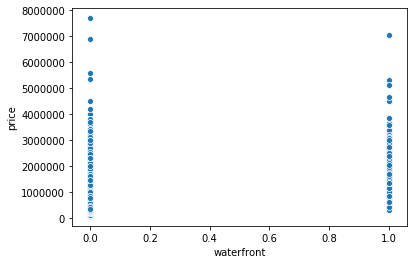

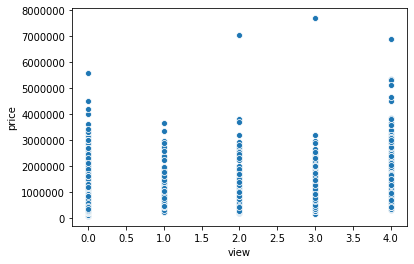

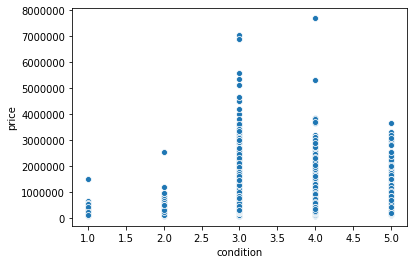

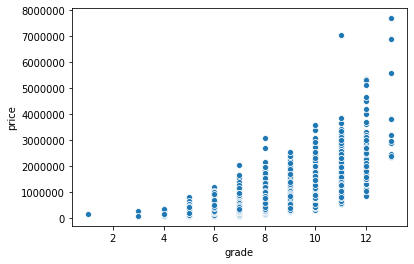

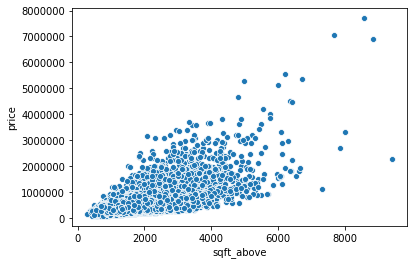

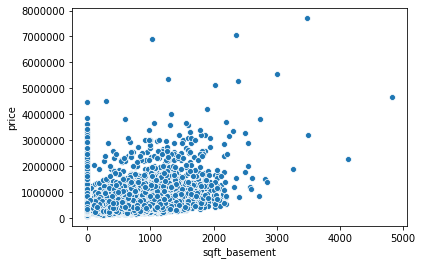

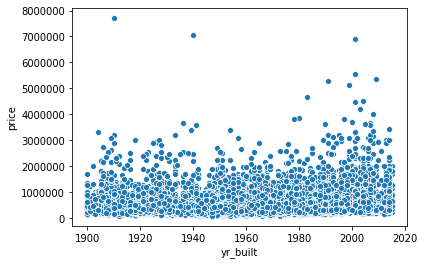

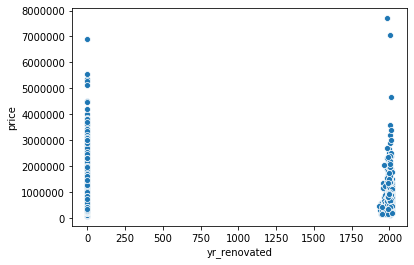

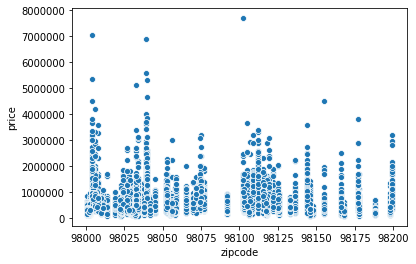

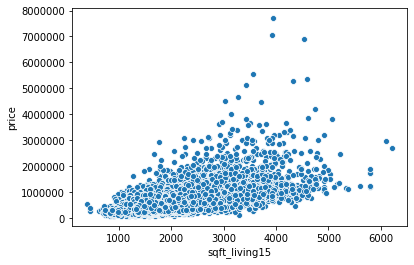

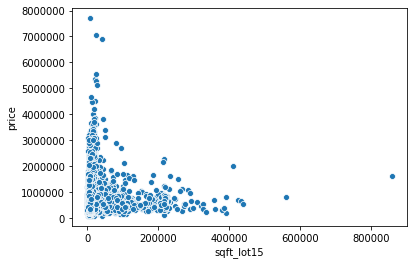

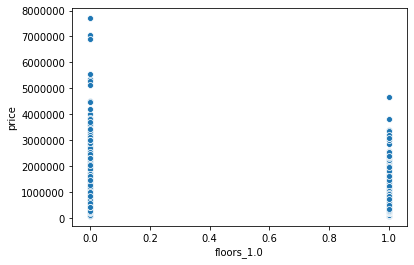

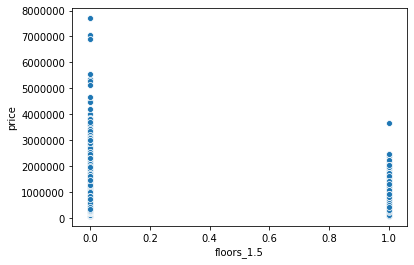

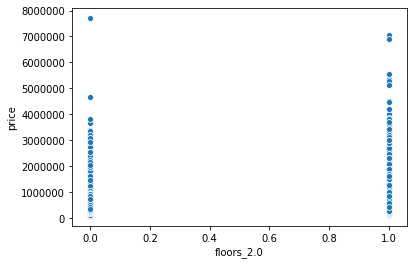

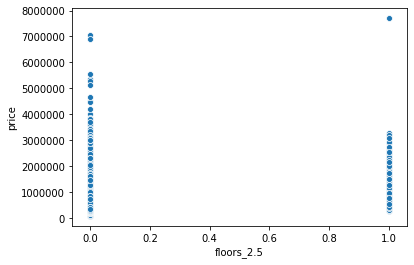

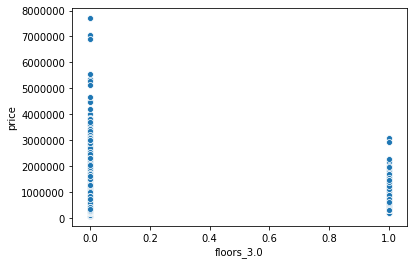

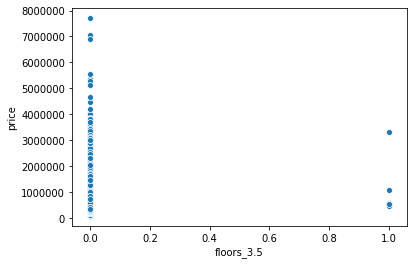

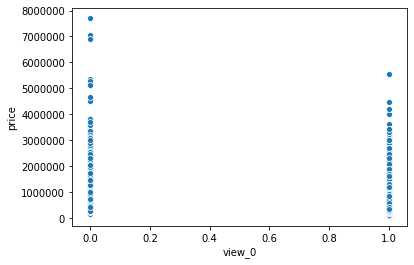

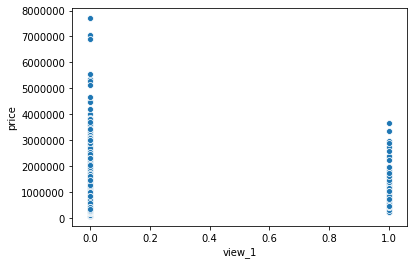

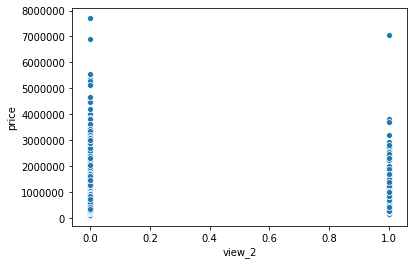

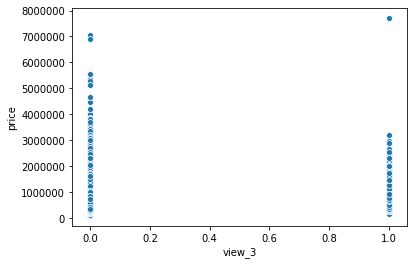

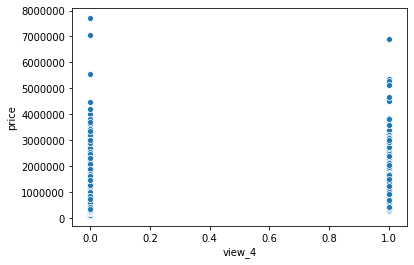

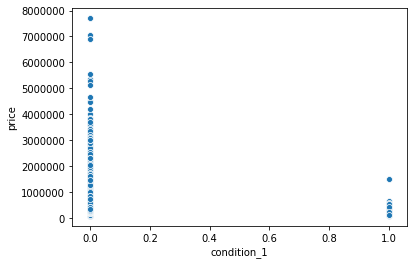

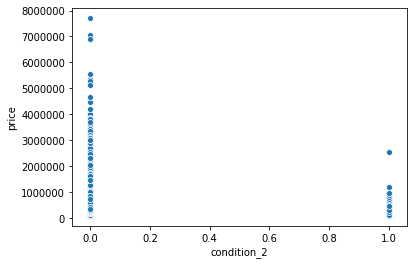

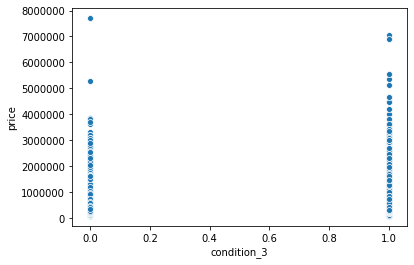

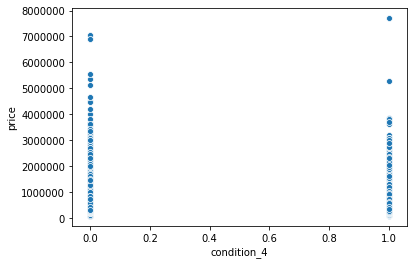

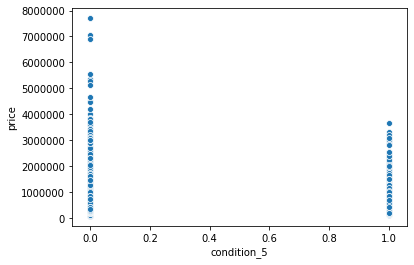

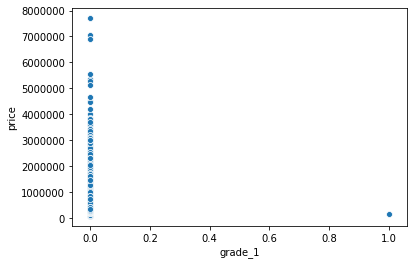

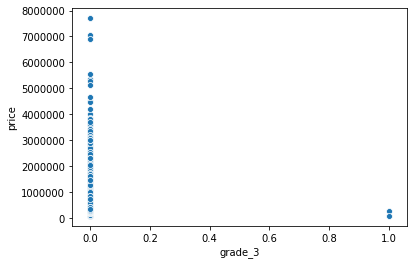

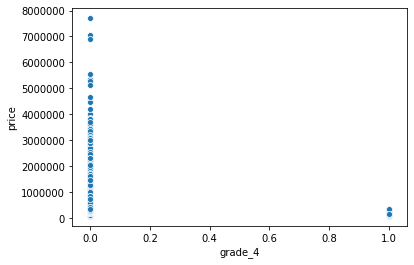

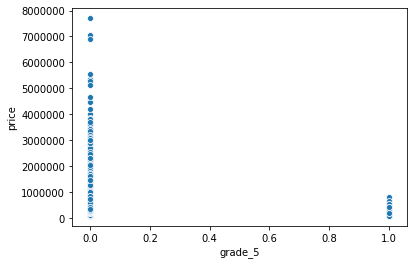

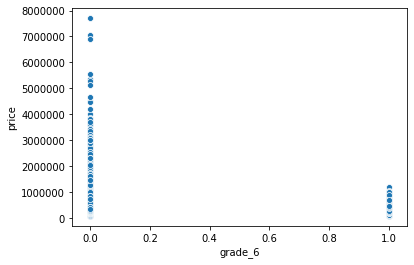

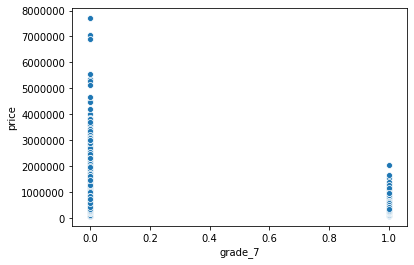

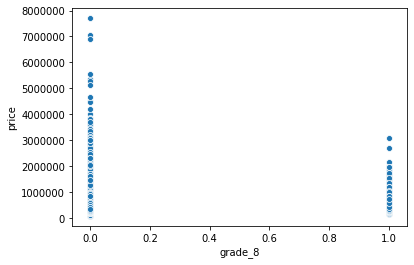

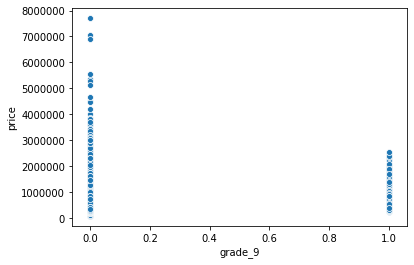

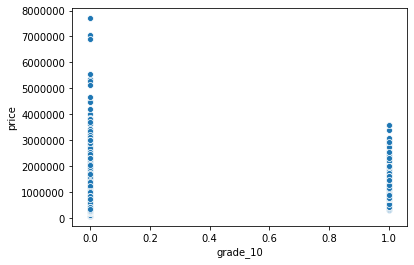

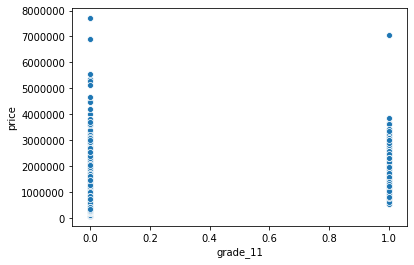

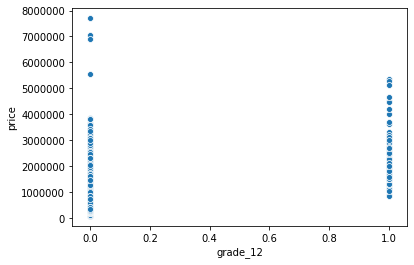

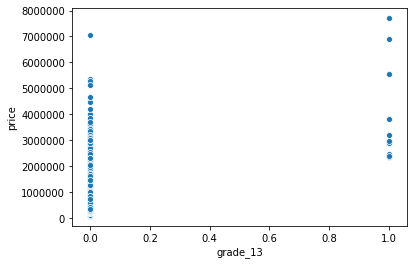

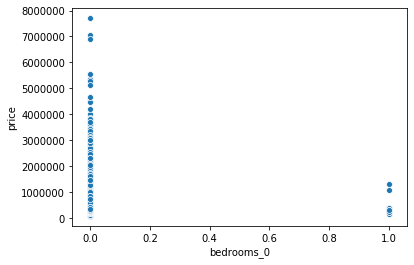

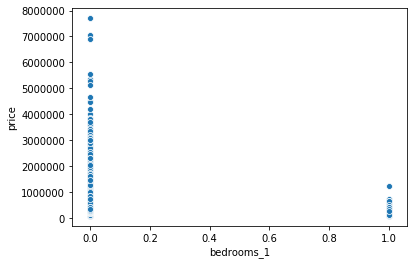

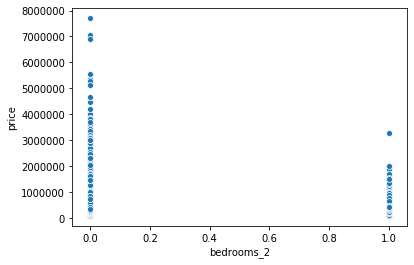

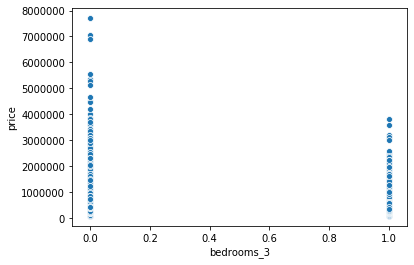

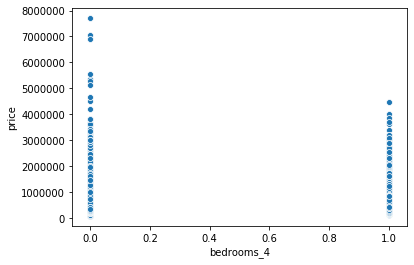

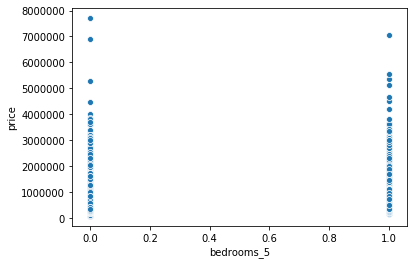

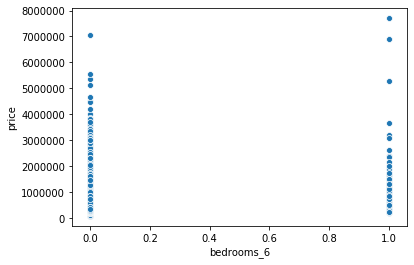

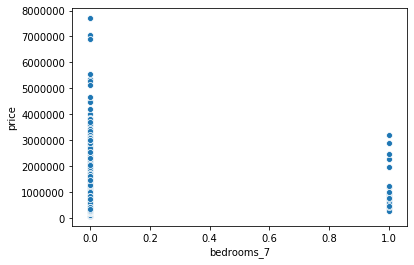

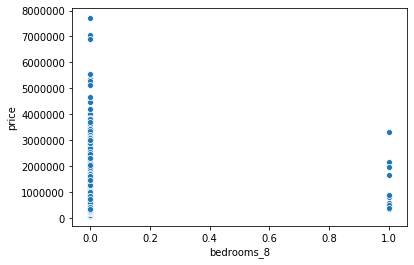

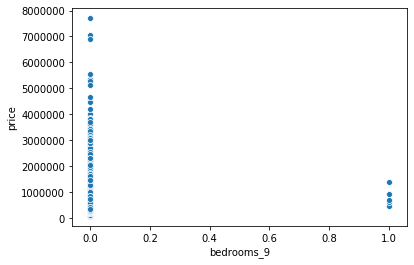

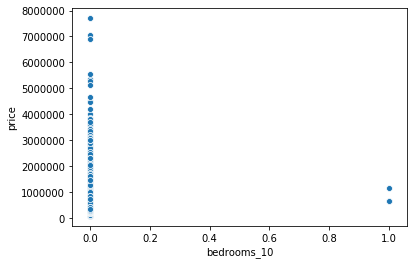

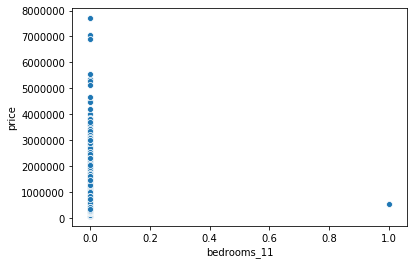

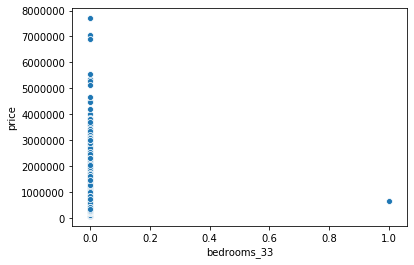

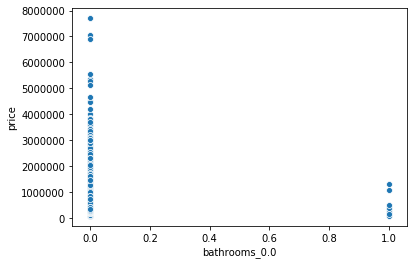

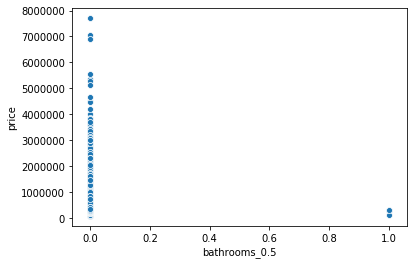

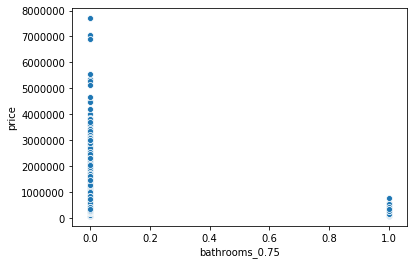

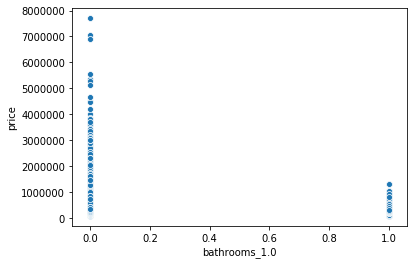

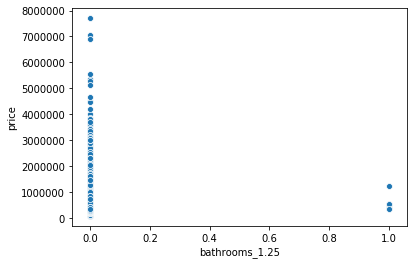

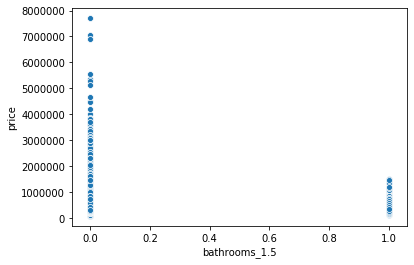

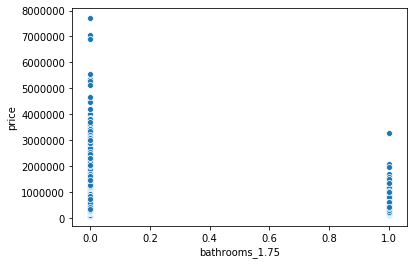

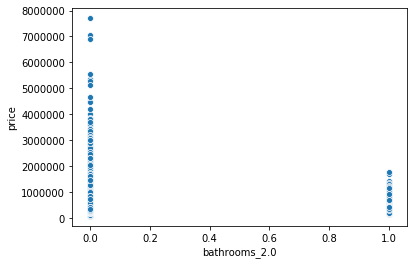

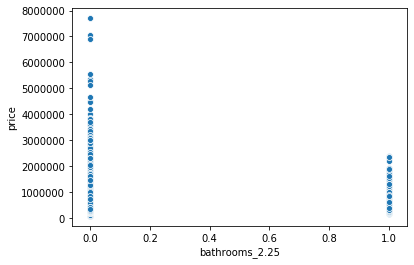

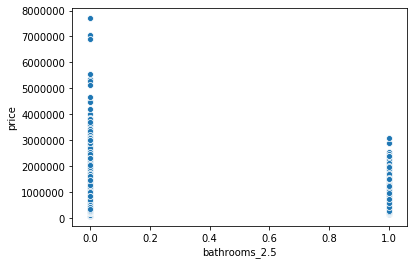

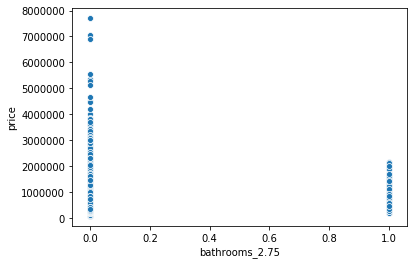

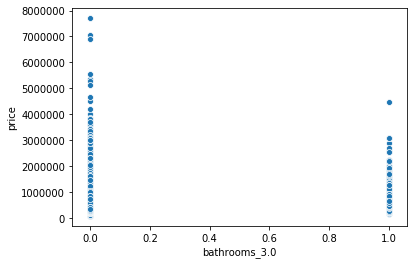

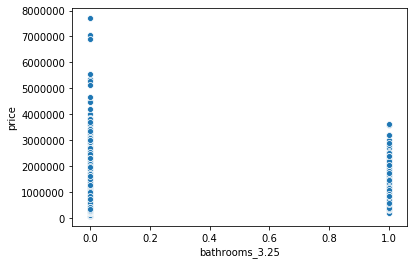

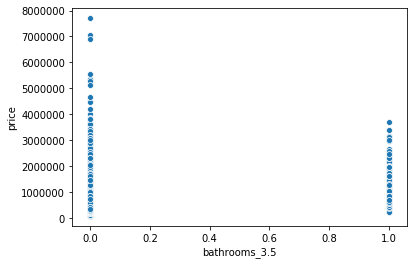

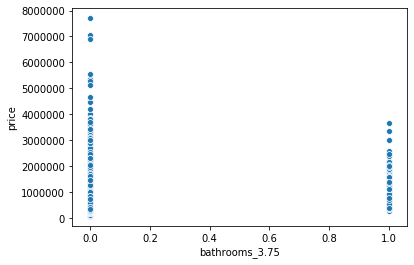

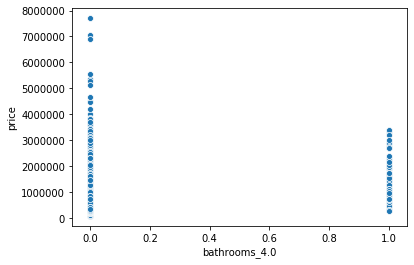

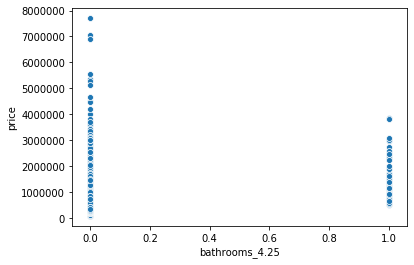

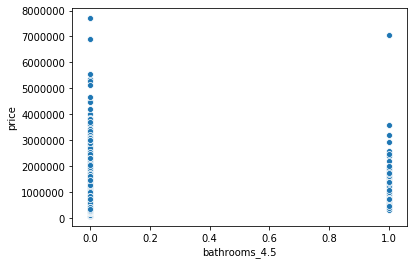

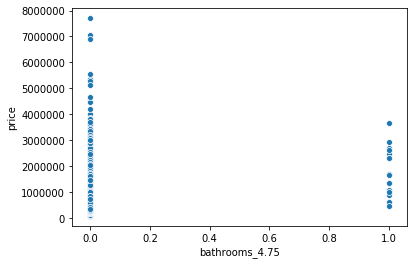

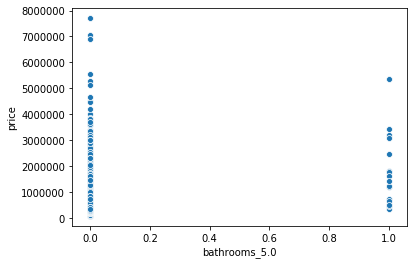

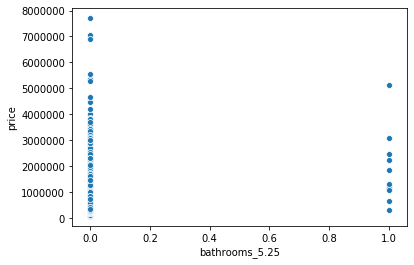

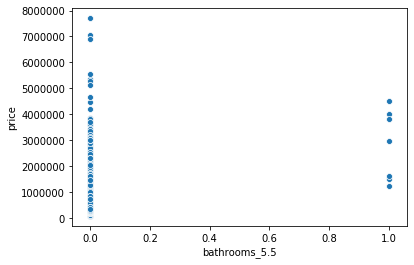

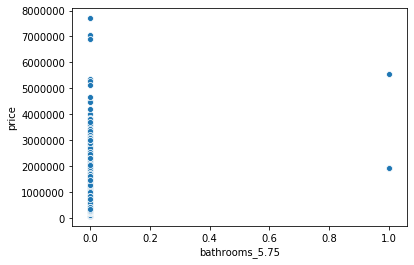

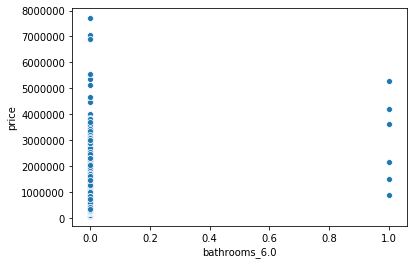

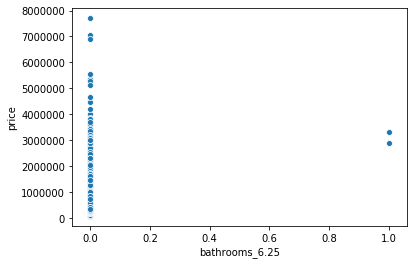

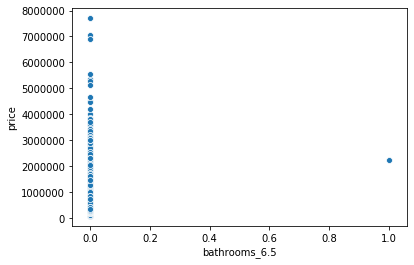

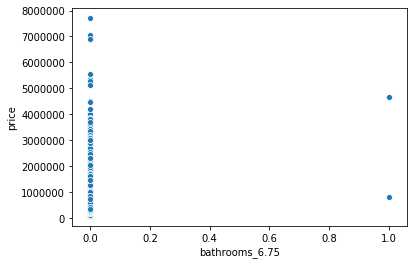

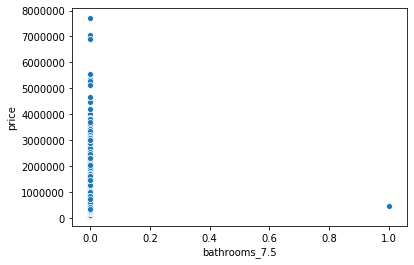

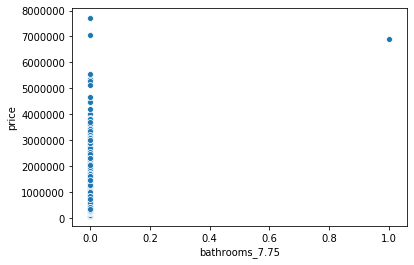

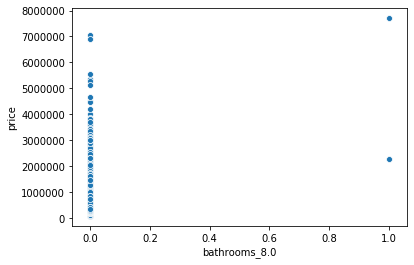

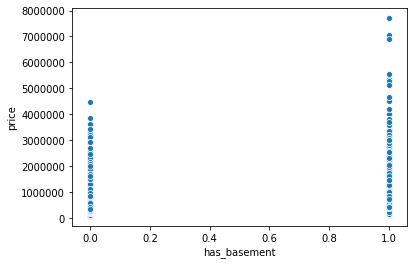

In [80]:
for key in df.keys():
    if (key == 'id' or key == 'date' or key == 'lat' or key == 'long'):
        continue
    else:
        sns.scatterplot(df[key], df['price'])
        plt.show()
    
